In [2]:
import pandas as pd

In [3]:
# Specify the file path (replace with your actual file path)
file_path = "real-data.xlsx"  

# Read the Excel file
excel_data = pd.ExcelFile(file_path)

# Dictionary to store each sheet as a DataFrame
dataframes = {}

# Loop through each sheet and save it as a DataFrame
for sheet_name in excel_data.sheet_names:
    dataframes[sheet_name] = pd.read_excel(file_path, sheet_name=sheet_name, header=0)

# Display the keys (sheet names) to confirm the data is loaded
print("Loaded Sheets:", dataframes.keys())


Loaded Sheets: dict_keys(['dose-nurse', 'home-nurse', 'RN', 'LVN'])


In [4]:
# Example: Accessing a specific DataFrame by sheet name
df1 = dataframes['dose-nurse']
df2 = dataframes['home-nurse']
df3 = dataframes['RN']
df4 = dataframes['LVN']

In [5]:
df1.head()

,Event,Duration,RN,LVN,Shots,Zip Code
0,1,10,2,2,40,90304
1,2,6,2,1,20,90291
2,3,13,2,3,70,90033
3,4,12,1,3,80,90014
4,5,12,2,2,80,90012


In [6]:
# turn 'Zip Code' column in df1 into a list
zip_code_list_1 = df1['Zip Code'].tolist()
zip_code_list_2 = df2['Zip Code'].tolist()
zip_code_list_3 = df3['Zip Code'].tolist()
zip_code_list_4 = df4['Zip Code'].tolist()

In [ ]:
# by type
zip_code_list_vax = zip_code_list_1 + zip_code_list_2
zip_code_list_home = zip_code_list_3 + zip_code_list_4

In [8]:
# by day
zip_code_list_vax_day1 = zip_code_list_1[:9]
zip_code_list_vax_day2 = zip_code_list_1[9:18]
zip_code_list_vax_day3 = zip_code_list_1[18:27]
zip_code_list_vax_day4 = zip_code_list_1[27:37]
zip_code_list_vax_day5 = zip_code_list_1[37:]

zip_code_list_home_day3 = zip_code_list_3[:5]
zip_code_list_home_day4 = zip_code_list_3[5:12]
zip_code_list_home_day5 = zip_code_list_3[12:]

In [10]:
print(len(zip_code_list_vax_day4))

10


In [12]:
import folium
import geopandas as gpd
import matplotlib.pyplot as plt

In [13]:
# Load Los Angeles County boundary shapefile
la_county_boundary = gpd.read_file("ca_counties")

# Load California ZIP Code boundaries shapefile
ca_zip_codes = gpd.read_file("LA_County_ZIP_Codes")

# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
ca_zip_codes = ca_zip_codes.to_crs(la_county_boundary.crs)

# Perform spatial join to get ZIP codes within LA County
la_zip_codes = gpd.sjoin(ca_zip_codes, la_county_boundary, how="inner", predicate="intersects")

In [22]:
def plot_zip_code_frequency(zip_code_list, la_zip_codes, title="ZIP Code Frequency Map"):
    """
    Generates a map of Los Angeles County ZIP codes, color-coded by the frequency
    of occurrences in the given zip_code_list.

    Parameters:
    - zip_code_list: List of ZIP codes to be counted and plotted.
    - la_zip_codes: GeoDataFrame containing LA County ZIP code boundaries.
    - title: Title of the plot.

    Returns:
    - None (displays the map).
    """

    # Create a DataFrame to count occurrences of each ZIP code
    zip_code_counts = pd.DataFrame(zip_code_list, columns=["ZIP"])
    zip_code_counts = zip_code_counts["ZIP"].value_counts().reset_index()
    zip_code_counts.columns = ["ZIP", "Count"]

    # Ensure ZIP columns are strings
    la_zip_codes["ZIP"] = la_zip_codes["ZIPCODE"].astype(str)  # Adjust as per shapefile
    zip_code_counts["ZIP"] = zip_code_counts["ZIP"].astype(str)

    # Merge ZIP counts with LA ZIP boundaries
    la_zip_codes_merged = la_zip_codes.merge(zip_code_counts, on="ZIP", how="left").fillna(0)
    # Filter out island ZIP codes (Catalina Island & San Clemente)**
    la_zip_codes_merged = la_zip_codes_merged[~la_zip_codes_merged["ZIP"].str.startswith("907")]

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 10))
    la_zip_codes_merged.plot(column="Count", cmap="Blues", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
    ax.set_title(title, fontsize=15)
    ax.axis("off")
    
    # save the map, name by title
    plt.savefig(title + ".png", dpi=300, bbox_inches='tight')

    # # Show the map
    # plt.show()


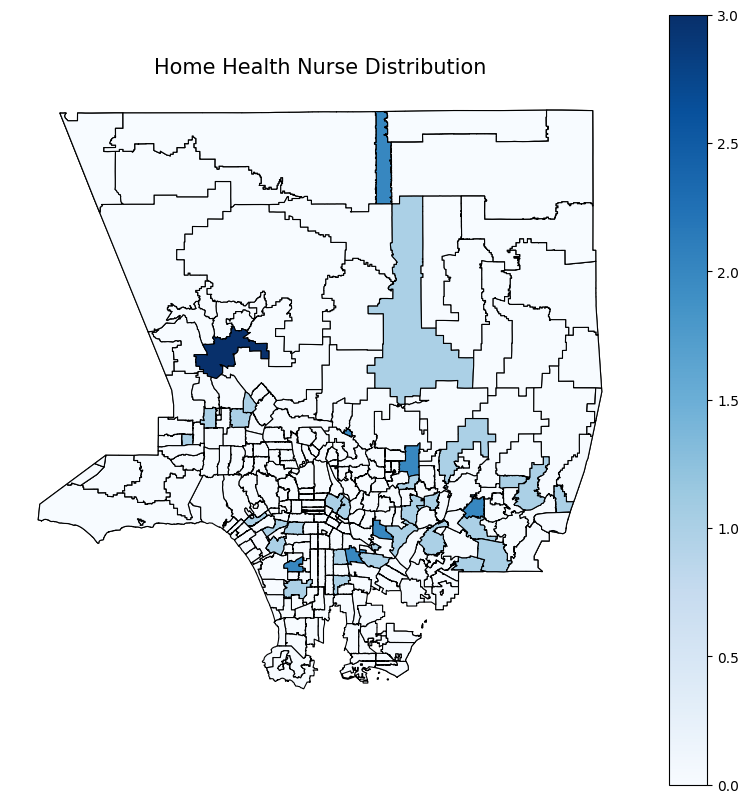

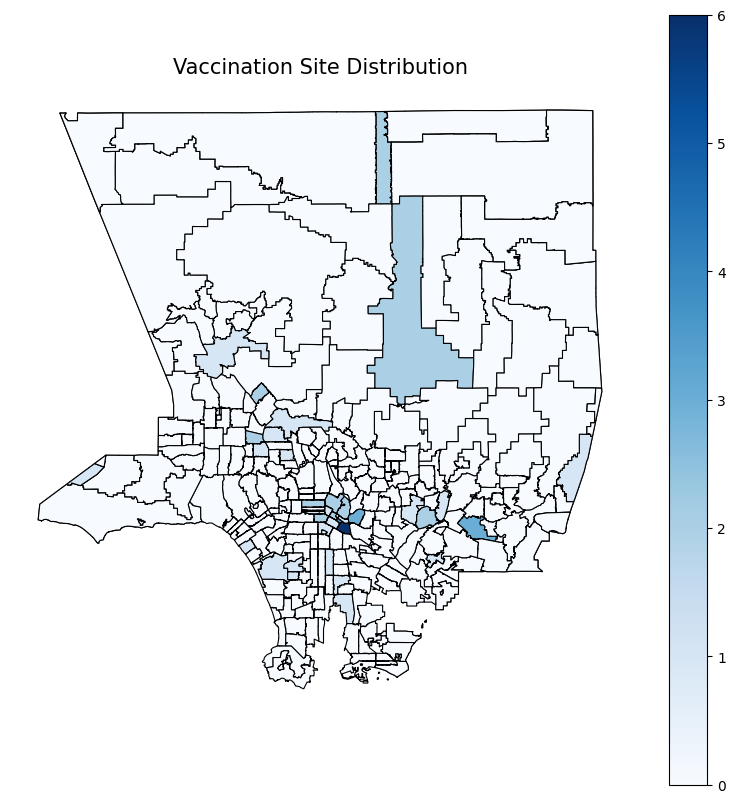

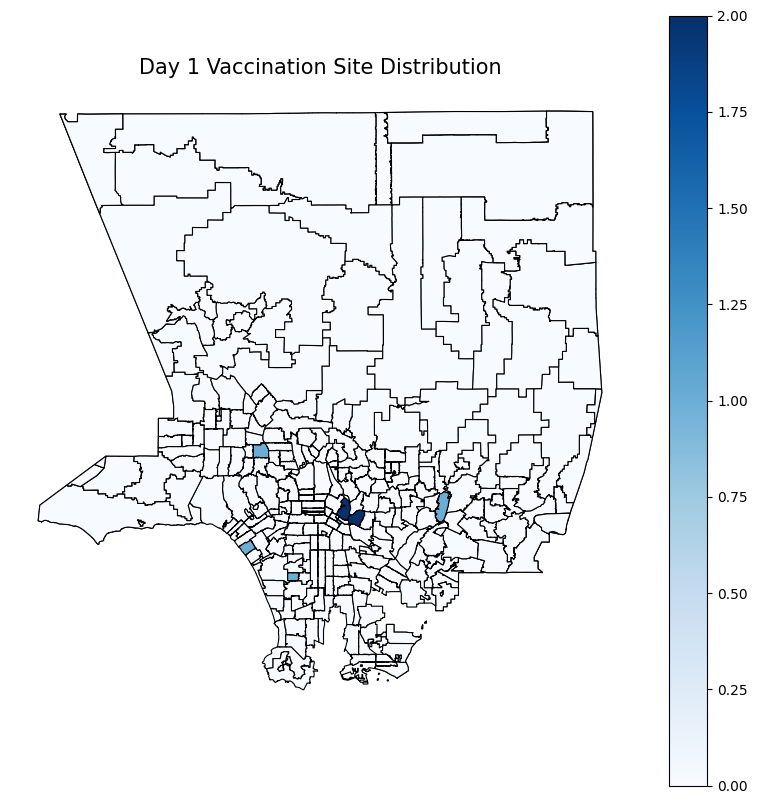

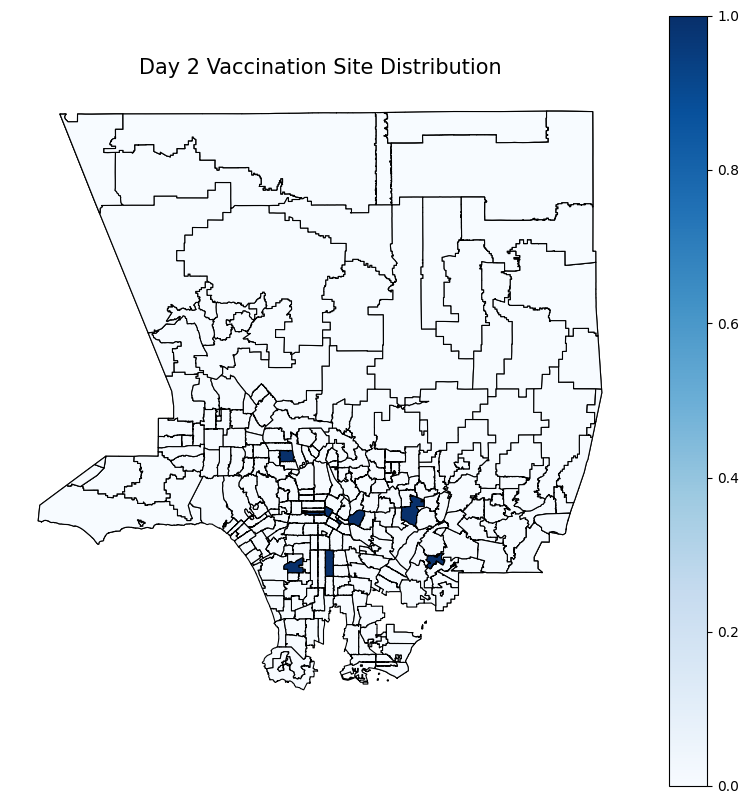

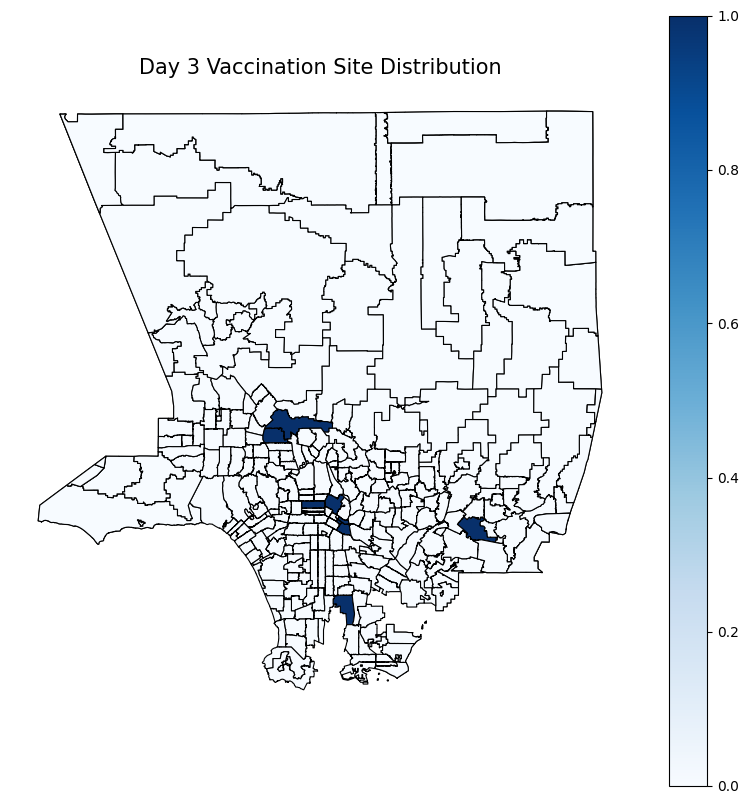

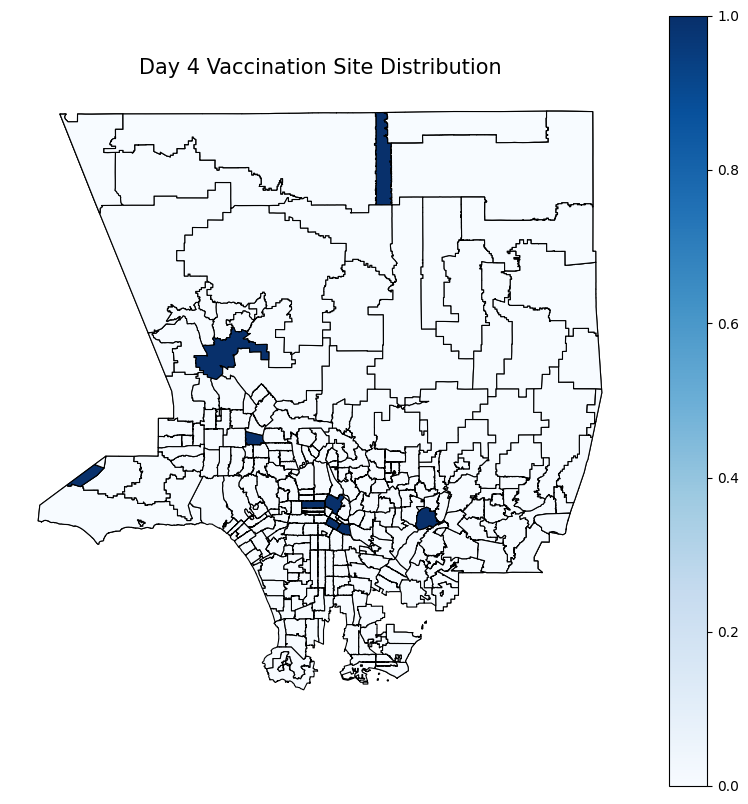

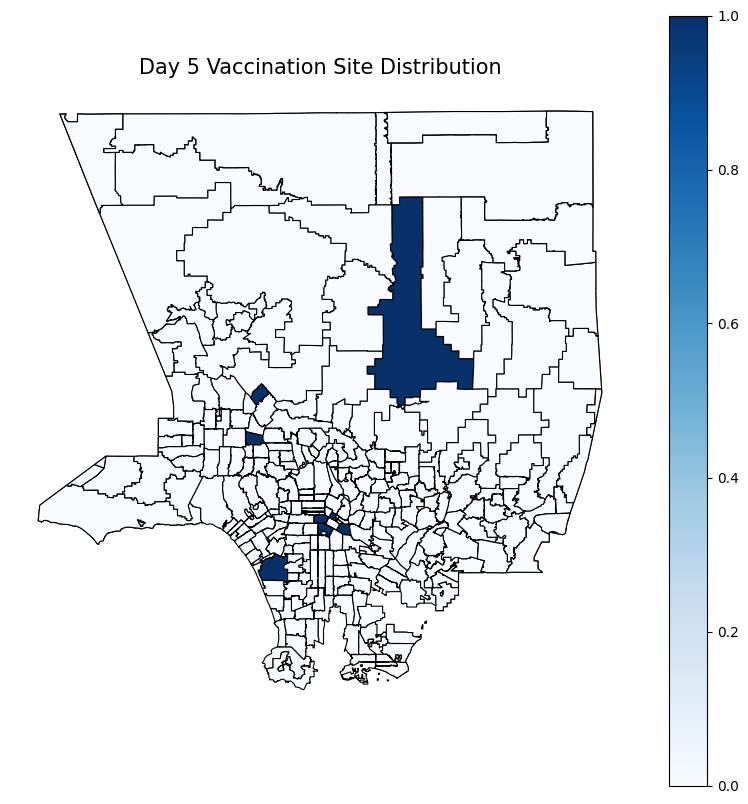

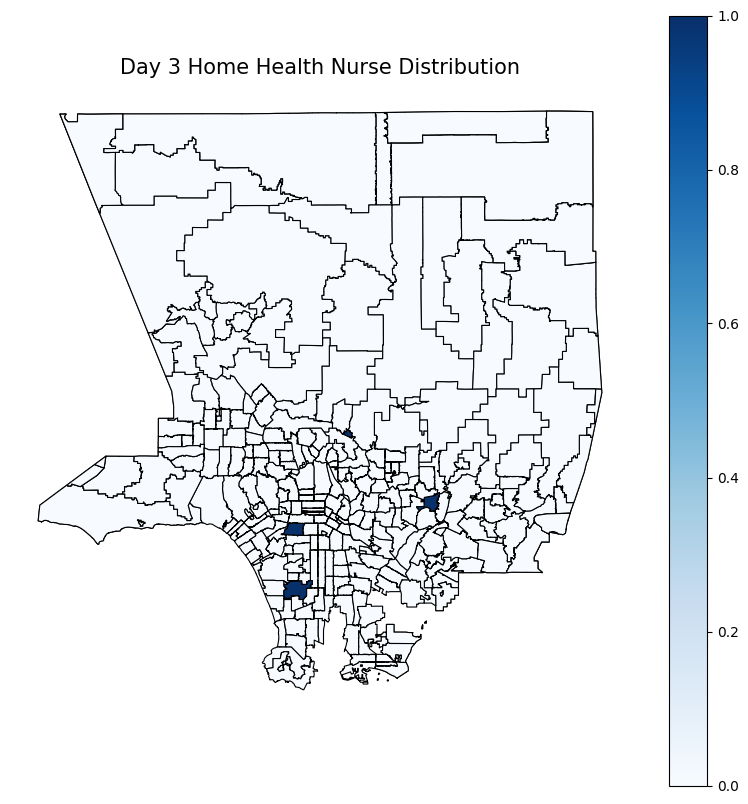

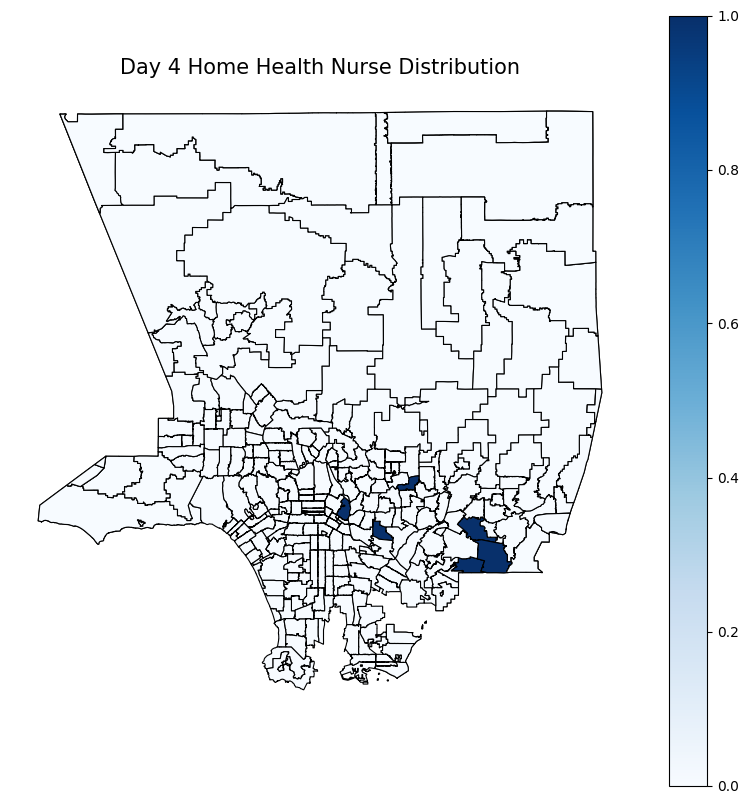

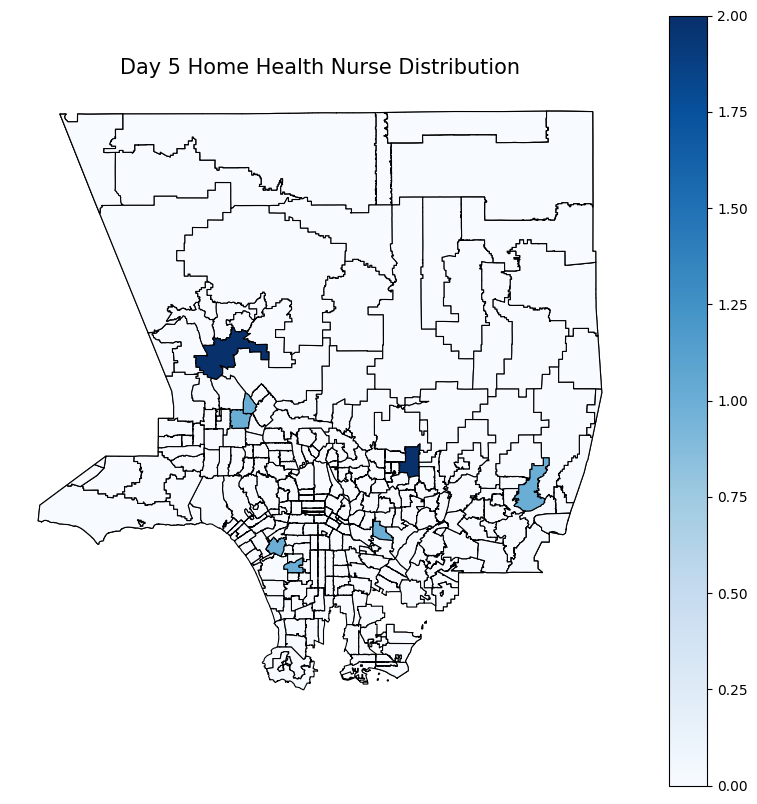

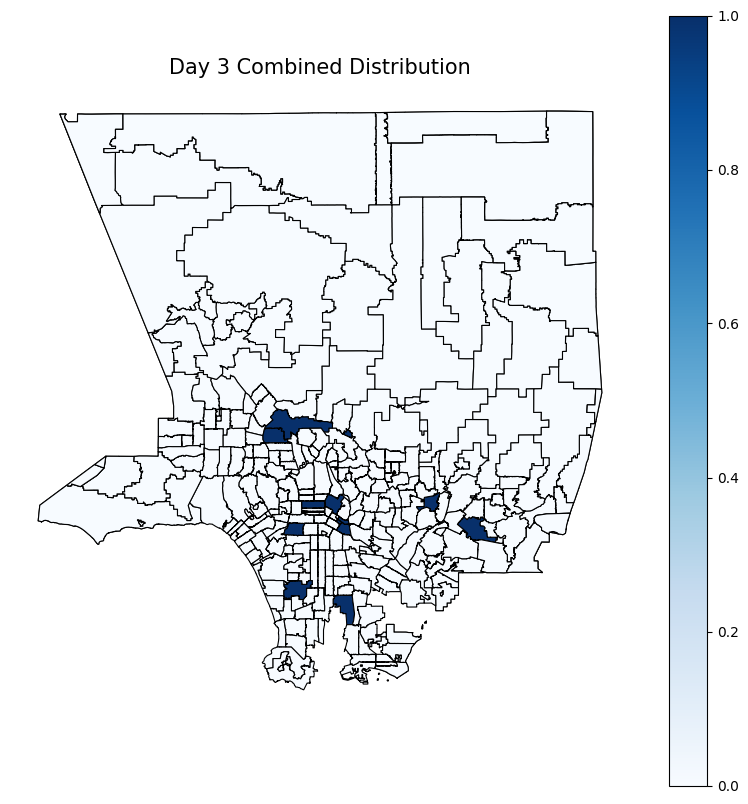

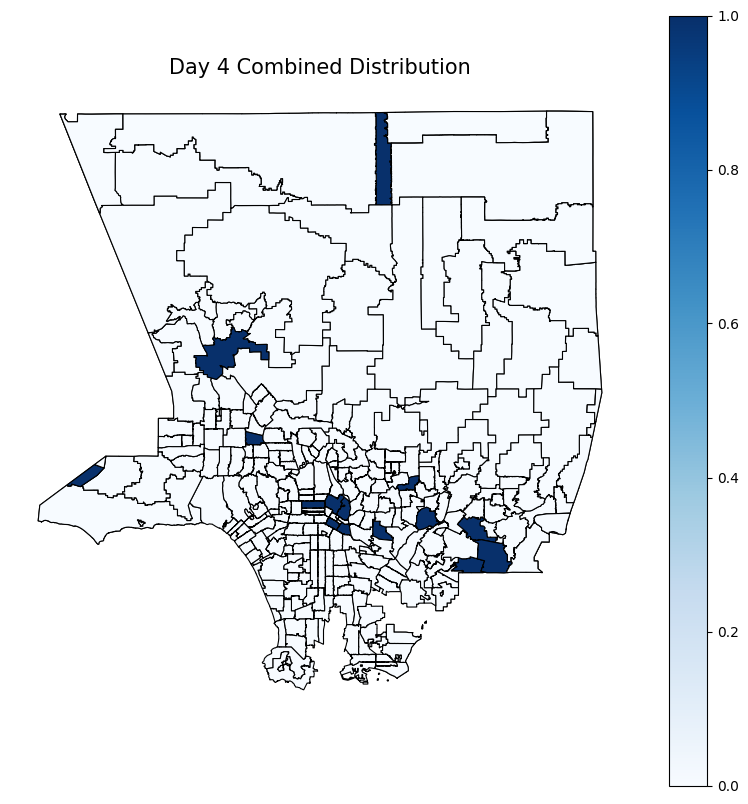

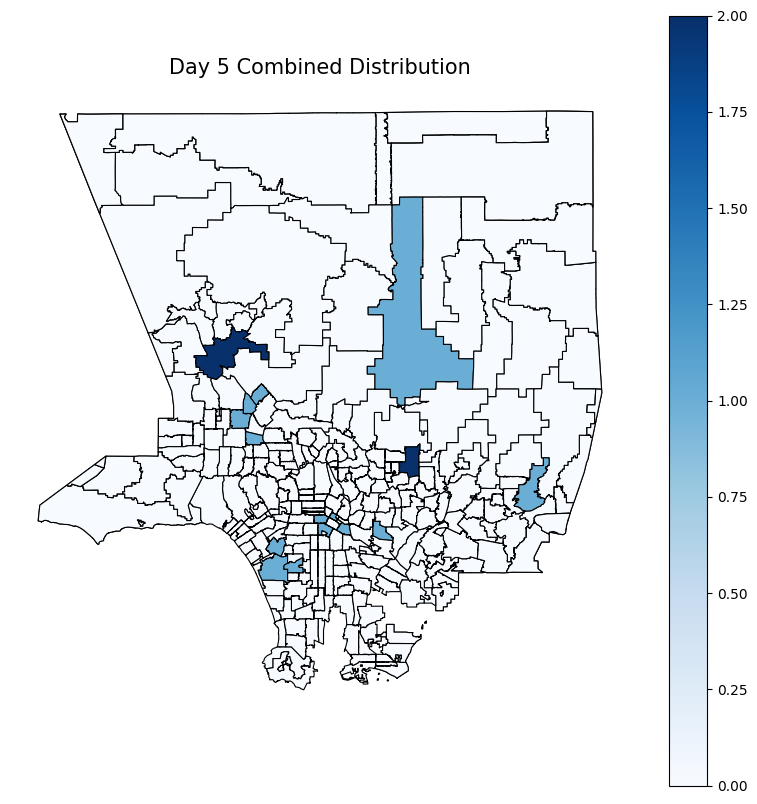

In [23]:
# Load Los Angeles County boundary shapefile
la_county_boundary = gpd.read_file("ca_counties")

# Load California ZIP Code boundaries shapefile
ca_zip_codes = gpd.read_file("LA_County_ZIP_Codes")

# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
ca_zip_codes = ca_zip_codes.to_crs(la_county_boundary.crs)

# Perform spatial join to get ZIP codes within LA County
la_zip_codes = gpd.sjoin(ca_zip_codes, la_county_boundary, how="inner", predicate="intersects")

# # Load LA County ZIP code boundaries once (outside the function)
# la_zip_codes = gpd.read_file("path_to_la_zip_boundaries.shp")  # Replace with actual path

plot_zip_code_frequency(zip_code_list_home, la_zip_codes, title="Home Health Nurse Distribution")
plot_zip_code_frequency(zip_code_list_vax, la_zip_codes, title="Vaccination Site Distribution")
plot_zip_code_frequency(zip_code_list_vax_day1, la_zip_codes, title="Day 1 Vaccination Site Distribution")
plot_zip_code_frequency(zip_code_list_vax_day2, la_zip_codes, title="Day 2 Vaccination Site Distribution")
plot_zip_code_frequency(zip_code_list_vax_day3, la_zip_codes, title="Day 3 Vaccination Site Distribution")
plot_zip_code_frequency(zip_code_list_vax_day4, la_zip_codes, title="Day 4 Vaccination Site Distribution")
plot_zip_code_frequency(zip_code_list_vax_day5, la_zip_codes, title="Day 5 Vaccination Site Distribution")
plot_zip_code_frequency(zip_code_list_home_day3, la_zip_codes, title="Day 3 Home Health Nurse Distribution")
plot_zip_code_frequency(zip_code_list_home_day4, la_zip_codes, title="Day 4 Home Health Nurse Distribution")
plot_zip_code_frequency(zip_code_list_home_day5, la_zip_codes, title="Day 5 Home Health Nurse Distribution")

plot_zip_code_frequency(zip_code_list_vax_day3 + zip_code_list_home_day3, la_zip_codes, title="Day 3 Combined Distribution")
plot_zip_code_frequency(zip_code_list_vax_day4 + zip_code_list_home_day4, la_zip_codes, title="Day 4 Combined Distribution")
plot_zip_code_frequency(zip_code_list_vax_day5 + zip_code_list_home_day5, la_zip_codes, title="Day 5 Combined Distribution")


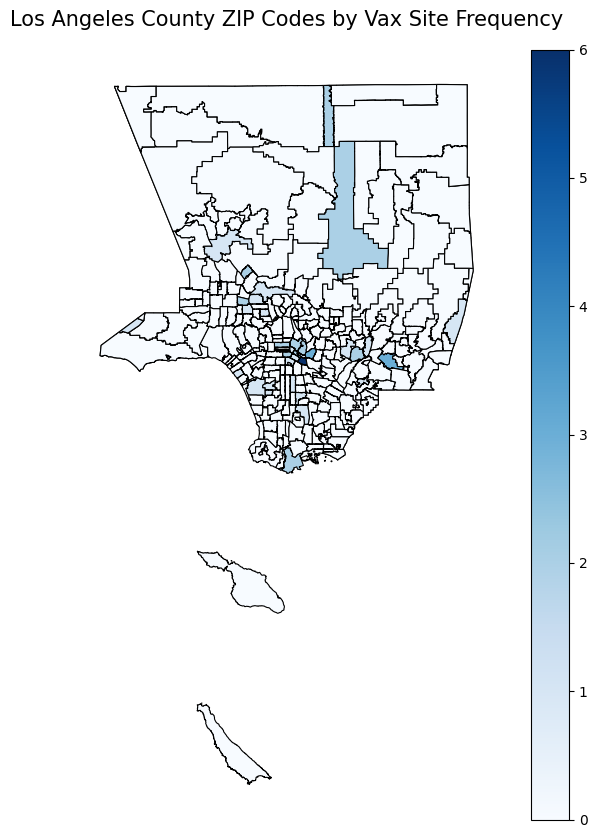

In [63]:
# Create a DataFrame to count occurrences of each ZIP code
zip_code_counts_vax = pd.DataFrame(zip_code_list_vax, columns=["ZIP"])
zip_code_counts_vax = zip_code_counts_vax["ZIP"].value_counts().reset_index()
zip_code_counts_vax.columns = ["ZIP", "Count"]

                                                       
# Merge the counts with the LA ZIP codes GeoDataFrame
la_zip_codes["ZIP"] = la_zip_codes["ZIPCODE"].astype(str)  # Adjust the column name as per your shapefile
# Convert both ZIP columns to string type
zip_code_counts_vax["ZIP"] = zip_code_counts_vax["ZIP"].astype(str)

la_zip_codes_vax = la_zip_codes.merge(zip_code_counts_vax, on="ZIP", how="left").fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
la_zip_codes_vax.plot(column="Count", cmap="Blues", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
ax.set_title("Los Angeles County ZIP Codes by Vax Site Frequency", fontsize=15)
ax.axis("off")
plt.show()


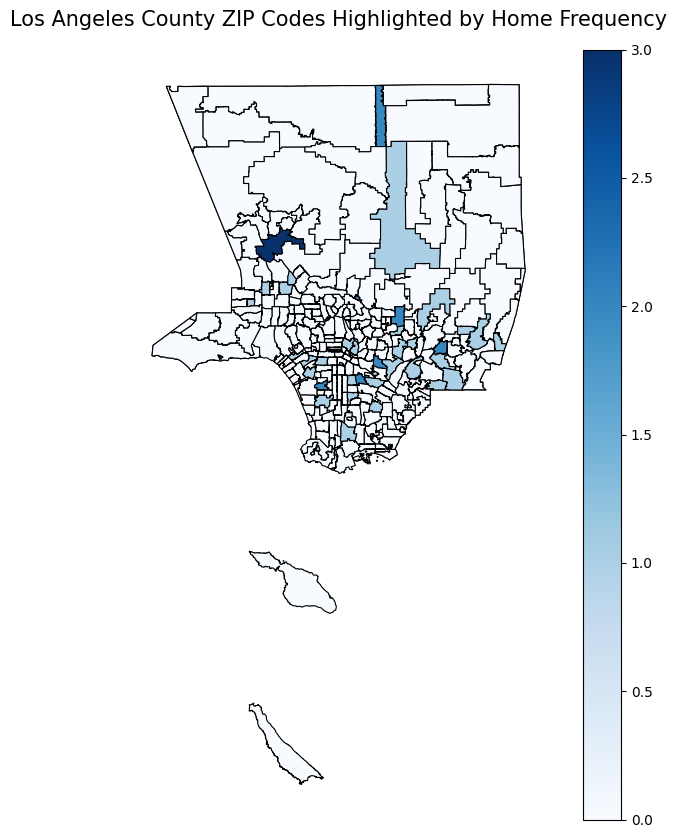

In [61]:
# Create a DataFrame to count occurrences of each ZIP code
zip_code_counts_home = pd.DataFrame(zip_code_list_home, columns=["ZIP"])
zip_code_counts_home = zip_code_counts_home["ZIP"].value_counts().reset_index()
zip_code_counts_home.columns = ["ZIP", "Count"]

                                                       
# Merge the counts with the LA ZIP codes GeoDataFrame
la_zip_codes["ZIP"] = la_zip_codes["ZIPCODE"].astype(str)  # Adjust the column name as per your shapefile
# Convert both ZIP columns to string type
zip_code_counts_home["ZIP"] = zip_code_counts_home["ZIP"].astype(str)

la_zip_codes_home = la_zip_codes.merge(zip_code_counts_home, on="ZIP", how="left").fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
la_zip_codes_home.plot(column="Count", cmap="Blues", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
ax.set_title("Los Angeles County ZIP Codes Highlighted by Home Frequency", fontsize=15)
ax.axis("off")
plt.show()
